In [1]:
import tensorflow as tf
import numpy as np
from sklearn import datasets
from tensorflow.examples.tutorials.mnist import input_data

In [2]:
# Function to read the MNIST dataset along with the labels
def read_infile():
    mnist = input_data.read_data_sets('./MNIST', one_hot=True)
    train_X, train_Y, test_X, test_Y = mnist.train.images, mnist.train.labels,mnist.test.images, mnist.test.labels
    return train_X,train_Y,test_X,test_Y

In [3]:
#  Define the weights and biases for the neural network
def weights_biases_placeholder(n_dim, n_classes):
    X = tf.placeholder(tf.float32,[None, n_dim])
    Y = tf.placeholder(tf.float32,[None, n_classes])
    w = tf.Variable(tf.random_normal([n_dim, n_classes],stddev=0.01), name='weights')
    b = tf.Variable(tf.random_normal([n_classes]), name='bias')
    return X,Y,w,b

In [5]:
# define the forward pass
def forward_pass(w,b,X):
    out=tf.matmul(X,w) + b
    return out

In [6]:
# Define the cost function
def multiclass_cost(out, Y):
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=out, labels=Y))
    return cost

In [7]:
# Define the initialization op
#def init():
 #   return tf.global_variables_initializer()

In [8]:
# define the trainig op
def train_op(learning_rate, cost):
    op_train = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
    return op_train
    

In [13]:
train_X, train_Y, test_X, test_Y = read_infile()
X,Y,w,b = weights_biases_placeholder(train_X.shape[1], train_Y.shape[1])
out = forward_pass(w,b,X)
cost = multiclass_cost(out,Y)
learning_rate = 0.01
epochs = 100
op_train = train_op(learning_rate, cost)
# init()
loss_trace = []
accuracy_trace = []

Extracting ./MNIST/train-images-idx3-ubyte.gz
Extracting ./MNIST/train-labels-idx1-ubyte.gz
Extracting ./MNIST/t10k-images-idx3-ubyte.gz
Extracting ./MNIST/t10k-labels-idx1-ubyte.gz


In [15]:
# Activate the tensorflow and the stochastic gradient
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for i in range(epochs):
        sess.run(op_train, feed_dict={X:train_X,Y:train_Y})
        loss_ = sess.run(cost, feed_dict={X:train_X,Y:train_Y})
        accuracy_ = np.mean(np.argmax(sess.run(out,feed_dict={X:train_X,Y:train_Y}),axis=1) == np.argmax(train_Y, axis=1))
        loss_trace.append(loss_)
        accuracy_trace.append(accuracy_)
        if (((i+1) >= 100) and ((i+1) % 100 == 0)):
            print('Epoch:', (i+1),'loss:', loss_,'accuracy:',accuracy_)    
        print('Final training result:','loss:', loss_, 'accuracy', accuracy_)
    loss_test = sess.run(cost, feed_dict={X:test_X,Y:test_Y})
    test_pred = np.argmax(sess.run(out, feed_dict={X:test_X,Y:test_Y}), axis=1)
    accuracy_test = np.mean(test_pred == np.argmax(test_Y, axis=1))
    print('Result on the test dataset:','loss:', loss_test, 'accuracy', accuracy_test)

Final training result: loss: 2.6608076 accuracy 0.10532727272727273
Final training result: loss: 2.6255965 accuracy 0.10707272727272728
Final training result: loss: 2.592507 accuracy 0.10961818181818182
Final training result: loss: 2.561312 accuracy 0.11325454545454545
Final training result: loss: 2.53182 accuracy 0.12161818181818182
Final training result: loss: 2.5038593 accuracy 0.13238181818181818
Final training result: loss: 2.4772868 accuracy 0.14452727272727273
Final training result: loss: 2.451974 accuracy 0.15923636363636365
Final training result: loss: 2.4278052 accuracy 0.1781090909090909
Final training result: loss: 2.4046884 accuracy 0.1986181818181818
Final training result: loss: 2.382534 accuracy 0.21892727272727272
Final training result: loss: 2.3612647 accuracy 0.23805454545454546
Final training result: loss: 2.3408148 accuracy 0.2570363636363636
Final training result: loss: 2.321122 accuracy 0.2741454545454545
Final training result: loss: 2.3021357 accuracy 0.290581818

Actual digits:    [7 2 1 0 4 1 4 9 5 9]
Predicted digits: [7 2 1 0 7 1 7 9 2 9]
Actual images of the digits follow:


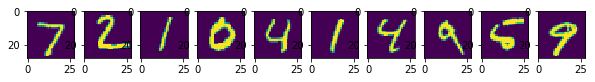

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
f, a = plt.subplots(1, 10, figsize=(10, 2))
print('Actual digits:   ', np.argmax(test_Y[0:10],axis=1))
print('Predicted digits:',test_pred[0:10])
print('Actual images of the digits follow:')
for i in range(10):
        a[i].imshow(np.reshape(test_X[i],(28, 28)))

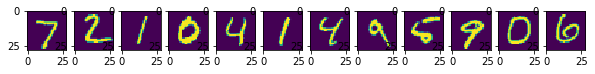

In [25]:
%matplotlib inline
f, a = plt.subplots(1, 12, figsize=(10, 2))
for i in range(12):
        a[i].imshow(np.reshape(test_X[i],(28, 28)))